# Ascii-2-Zmap

## Workflow needed to generate a zmap file format from ascii grid (gravity data in this case) for import into IHS Kingdom software.
### A couple of notes on initial data formats:
* received as geotiff (which could convert directly from that?)
* none the less, converted to ascii grid in ArcMap (Esri) (other none expensive ways...yes!)
* export format was showing as ".txt" --> changed suffix to ".asc"

### Requirements (modules): gdal/ogr, numpy, zmapio, matplotlib, pandas/geopandas

**Links (gdal zmap driver info, zmap background)**
<br>**Potential add-ons:**
* additional mapping in geopandas, etc.
* make it faster with vaex?
* re-gridding/sampling with verde?
* extract data by mask
* other graphing needs
* rasterio for geotiff integration?

Phillip Bailey III | RZG LLC | July 2020

In [29]:
import os
import linecache 

In [51]:
# fld = "./xcover_gravmags/"
# filename = "ras_grav09.txt"
# data = os.path.join(fld, filename)
# print(data)
os.chdir = "./xcover_gravmags/"

In [59]:
filename = 'ras_grav09.asc'
f = open(filename, 'r')
# num_lines = sum(1 for line in f)
# print(num_lines)
# f.read()
hdr=[]
count = 0
N = 6 # ideally...inspect file first and determine how many header lines are present

with f as file:
    while count < N:
#         print(count)
        x = count + 1
        line = linecache.getline(filename, x).strip()
        hdr.append(line)
        print(line)
        count +=1

ncols         1292
nrows         1167
xllcorner     438234.88299622
yllcorner     5856831.5005477
cellsize      417.42485072882
NODATA_value  -9999


In [49]:
!head -6 'ras_grav09.asc'

In [ ]:
import gdal
import ogr
from osgeo import osr

In [32]:
# drv_in = gdal.GetDriverByName('AAIGRID')
drv_out = gdal.GetDriverByName('ZMAP')
ds_in = gdal.Open('ras_grav09.asc')
ds_out = drv_out.CreateCopy('ras_grav09.zmap', ds_in)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
ds_out.SetProjection(srs.ExportToWkt())
ds_in = None
ds_out = None

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from zmapio import ZMAPGrid
%matplotlib inline

In [34]:
z_file = ZMAPGrid('./ras_grav09.zmap')

In [63]:
for c in z_file.comments:
    print(c)


 Created by GDAL.



    header = {
        "name": rows[0][0].strip()[1:],
        "z_type": rows[0][1].strip(),
        "nodes_per_line": int(rows[0][2]),
        "field_width": int(rows[1][0]),
        "null_value": rows[1][1].strip(),
        "null_value_2": rows[1][2].strip(),
        "decimal_places": int(rows[1][3]),
        "start_column": int(rows[1][4]),
        "no_rows": int(rows[2][0]),
        "no_cols": int(rows[2][1]),
        "min_x": np.float64(rows[2][2]),
        "max_x": np.float64(rows[2][3]),
        "min_y": np.float64(rows[2][4]),
        "max_y": np.float64(rows[2][5]),
    }

In [83]:
z_file.min_x, z_file.max_x, z_file.min_y, z_file.max_y

(438234.8829962, 977547.7901379, 5856832.0, 6343966.0)

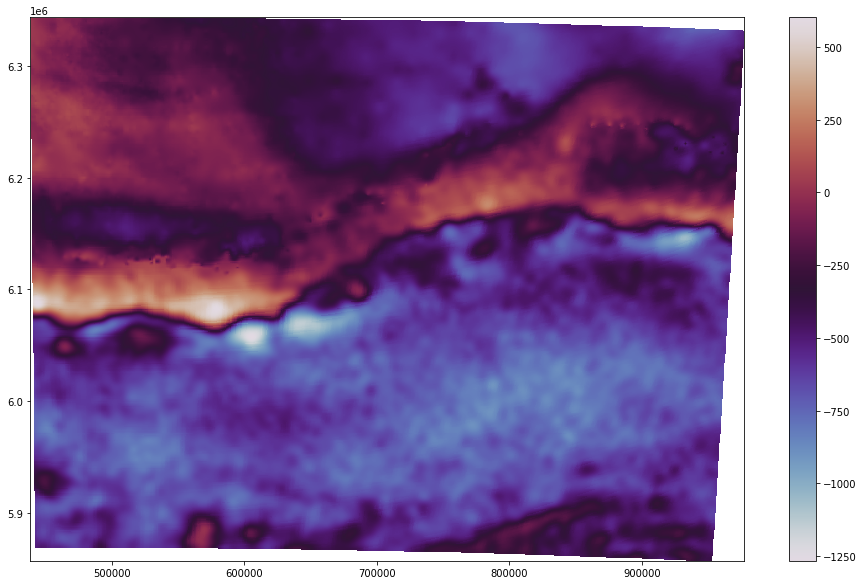

In [61]:
fig=plt.figure(figsize=(16, 10))
z_file.plot(cmap='twilight')
plt.colorbar()
# z_file.plot()

In [37]:
z_file.z_values.shape

(1292, 1167)

In [44]:
import pandas

In [45]:
df = z_file.to_dataframe()

In [47]:
display(df)

,X,Y,Z
0,438234.882996,6.343966e+06,NaN
1,438234.882996,6.343548e+06,NaN
2,438234.882996,6.343130e+06,NaN
3,438234.882996,6.342713e+06,NaN
4,438234.882996,6.342295e+06,NaN
...,...,...,...
1507759,977547.790138,5.858503e+06,NaN
1507760,977547.790138,5.858085e+06,NaN
1507761,977547.790138,5.857668e+06,NaN
1507762,977547.790138,5.857250e+06,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d23b10>]],
      dtype=object)

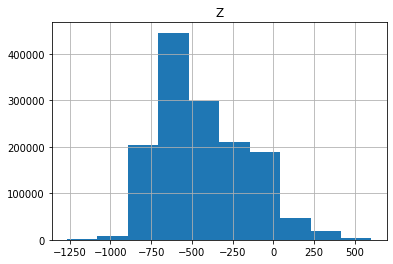

In [85]:
df.hist(column = 'Z',bins = 10)